In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [48]:
# 데이터 불러오기
data = pd.read_csv('/content/fraud.csv')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

**데이터 구조**

In [50]:
pd.set_option('display.max_columns', 50)

In [51]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


**결측치 처리**

In [54]:
# 결측치 갯수 확인
data.isna().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


In [55]:
# 결측행 확인
data[data[['merch_long', 'is_fraud']].isna().any(axis=1)]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [56]:
# 결측치 제거
data = data.dropna(subset=['merch_long', 'is_fraud'])
data.shape

(491134, 22)

**이상치 처리**

In [57]:
# 데이터 분포 확인
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [58]:
# 이상치 탐지
from scipy.stats import zscore

# Z-Scores 계산하기 (Z-Score > 3 or < -3)
z_scores = data[['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']].apply(zscore)
outliers_z = (z_scores.abs() > 3).sum()
outliers_z

,0
amt,4428
city_pop,19695
lat,0
long,0
merch_lat,0
merch_long,0


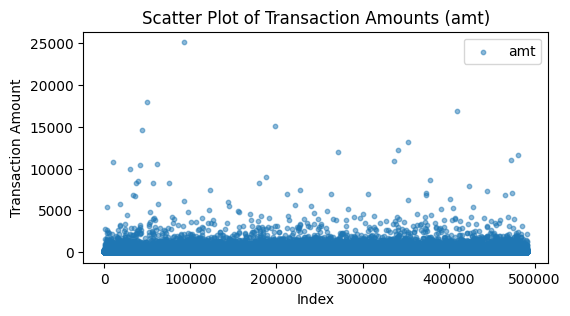

In [59]:
# amt 산점도 체크
plt.figure(figsize=(6, 3))
plt.scatter(range(len(data['amt'])), data['amt'], alpha=0.5, s=10, label='amt')
plt.title('Scatter Plot of Transaction Amounts (amt)')
plt.xlabel('Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

In [60]:
# amt > 15000 이상 행 확인
data[data['amt'] > 15000]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
49446,2019-04-07 15:32:23,6538441737335434,fraud_Tillman LLC,travel,17897.24,Gina,Grimes,F,444 Robert Mews,Clarks Mills,PA,16114,41.3851,-80.1752,606,Energy manager,1997-09-22,1c9f2b574fb9bf860c76ea200252fe05,1333812743,41.361042,-79.665772,0
93045,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,76383,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,42.397174,-71.474163,0
198719,2019-11-17 20:00:17,2264937662466770,fraud_Goyette-Herzog,travel,15047.03,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,TX,78214,29.3641,-98.4924,1595797,Land,1995-10-17,969e374d8c4e1a628b60150391a70742,1353182417,29.849413,-98.224021,0
410031,2020-09-21 12:02:00,3566094707272327,fraud_Johnston-Casper,travel,16837.08,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,Newhall,CA,91321,34.3795,-118.5230,34882,Health physicist,1971-04-25,ba246b12f894ab083706e72f9d90ad15,1379764920,35.111725,-118.128435,0


여행 카테고리에서 고액 결제 가능하므로 제거하지 않는 것으로 결정

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


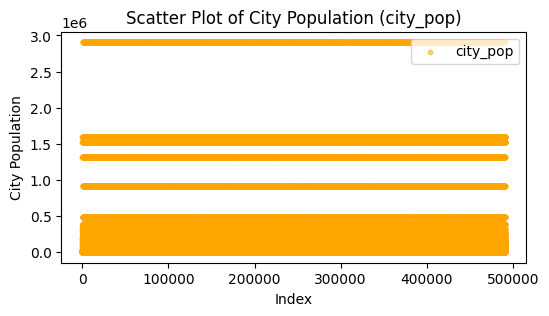

In [61]:
# city_pop 산점도 체크
plt.figure(figsize=(6, 3))
plt.scatter(range(len(data['city_pop'])), data['city_pop'], alpha=0.5, s=10, label='city_pop', color='orange')
plt.title('Scatter Plot of City Population (city_pop)')
plt.xlabel('Index')
plt.ylabel('City Population')
plt.legend()
plt.show()

대도시 인구 다를 수 있으므로 제거하지 않는 것으로 결정

In [62]:
# 중복 데이터 확인
data.duplicated().sum()

0

### 날짜 및 시간 데이터 처리

In [64]:
# 날짜 및 시간 열을 datetime 형식으로 변환
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# 연도, 월, 일, 요일, 시간대 추출
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['weekday'] = data['trans_date_trans_time'].dt.dayofweek  # 월=0, 일=6
data['hour'] = data['trans_date_trans_time'].dt.hour

In [65]:
# 시간대별 범주 추가 (심야, 아침, 오후, 저녁)
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data['time_of_day'] = data['hour'].apply(categorize_hour)

In [66]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,weekday,hour,time_of_day
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1,1,1,0,Night
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019,1,1,1,0,Night
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019,1,1,1,0,Night
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019,1,1,1,0,Night
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019,1,1,1,0,Night


In [67]:
# 시간 간격 계산 (고객별 연속 거래 간 시간 차이)
data = data.sort_values(by=['cc_num', 'trans_date_trans_time'])
data['time_diff'] = data.groupby('cc_num')['trans_date_trans_time'].diff().dt.seconds

In [68]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,weekday,hour,time_of_day,time_diff
55,2019-01-01 04:34:51,503874407318,"fraud_Lind, Huel and McClure",gas_transport,63.89,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,1595797,Exhibition designer,1975-12-28,5ef7adf6786b41be780a08212b32495e,1325392491,28.740953,-99.391846,0,2019,1,1,1,4,Night,NaN
238,2019-01-01 14:14:18,503874407318,"fraud_Runolfsdottir, Mueller and Hand",entertainment,40.75,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,1595797,Exhibition designer,1975-12-28,7d4f71c78267f01b54c92804a7aa1c80,1325427258,29.165407,-98.012932,0,2019,1,1,1,14,Afternoon,34767.0
502,2019-01-01 20:49:42,503874407318,fraud_Will Ltd,food_dining,105.78,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,1595797,Exhibition designer,1975-12-28,dd25ad6eb8d19c91179b1aec1cd698f3,1325450982,30.468436,-98.663858,0,2019,1,1,1,20,Evening,23724.0
529,2019-01-01 21:23:54,503874407318,fraud_Dickinson-Rempel,misc_pos,92.64,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,1595797,Exhibition designer,1975-12-28,b3c21c15df76d9a71ed87fe75fe8d525,1325453034,29.361914,-98.911457,0,2019,1,1,1,21,Evening,2052.0
709,2019-01-02 11:49:04,503874407318,fraud_Murray Ltd,grocery_net,28.43,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,1595797,Exhibition designer,1975-12-28,9c6c99ce4bf96caea86b150f95ab08a5,1325504944,29.642642,-97.557834,0,2019,1,2,2,11,Morning,51910.0


In [69]:
#시간 간격 분포 확인
data['time_diff'].describe()

,time_diff
count,491010.000000
mean,14941.495469
std,16569.981291
min,0.000000
25%,3318.000000
50%,8771.000000
75%,20357.750000
max,86399.000000


In [70]:
#0초 거래 빈도 확인
zero_time_diff = data[data['time_diff'] == 0]
len(zero_time_diff)

21

In [71]:
zero_time_diff

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,weekday,hour,time_of_day,time_diff
355934,2020-07-07 10:27:48,571365235126,fraud_Heidenreich PLC,grocery_pos,98.43,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,a5c94c2904cfee227550d36e308c79bc,1373192868,43.730192,-85.219833,0,2020,7,7,1,10,Morning,0.0
148493,2019-08-26 21:47:51,581686439828,fraud_O'Connell-Ullrich,home,46.85,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8be3dfbb7768fd987916547b0c87698b,1346017671,40.783844,-80.687971,0,2019,8,26,0,21,Evening,0.0
216073,2019-12-08 14:36:51,630423337322,fraud_Kutch-Ferry,home,4.07,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,d6bf64aac3aa7a186c940baaef294c6b,1354977411,48.508685,-118.381507,0,2019,12,8,6,14,Afternoon,0.0
464306,2020-12-09 13:52:44,639023984367,"fraud_Runolfsdottir, Mueller and Hand",entertainment,14.81,Destiny,Lowe,F,79472 Stevens Trace Apt. 120,Hannawa Falls,NY,13647,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,e33c247d911881bb172032e04833d217,1386597164,44.538403,-74.484949,0,2020,12,9,2,13,Afternoon,0.0
463376,2020-12-08 17:44:27,4745996322265,fraud_Rau-Robel,kids_pets,45.82,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346,41.4802,-86.6919,1423,"Psychologist, forensic",1998-10-07,09165389bd1c298355f523da09d4edeb,1386524667,41.589833,-87.495321,0,2020,12,8,1,17,Afternoon,0.0
365257,2020-07-20 01:51:36,4755696071492,fraud_Marks Inc,gas_transport,91.50,Robert,Evans,M,01892 Patricia Vista Apt. 828,Sachse,TX,75048,32.9643,-96.6012,20328,Site engineer,1985-06-20,02d8dd13601ea982d7954b225807fe1a,1374285096,33.405279,-97.535380,0,2020,7,20,0,1,Night,0.0
348895,2020-06-28 16:09:19,30199621383748,fraud_Daugherty-Thompson,food_dining,89.40,Theresa,Powell,F,117 Natasha Vista Suite 936,Leonard,TX,75452,33.4044,-96.2238,4090,Sub,1977-03-23,ee9550afc909a99f626866b95c6a63ad,1372435759,34.131877,-95.658458,0,2020,6,28,6,16,Afternoon,0.0
136788,2019-08-11 19:26:21,180036456789979,"fraud_Wiza, Schaden and Stark",misc_pos,9.55,Mackenzie,Salazar,F,982 Melissa Lock,Bagley,WI,53801,42.9207,-91.0685,878,Risk analyst,1974-11-20,820094b6c8fba8185efa9ee606657fad,1344713181,43.714995,-90.654637,0,2019,8,11,6,19,Evening,0.0
95223,2019-06-16 23:58:35,374930071163758,fraud_Kub-Heaney,health_fitness,37.25,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,698d8d3b7a2da55b212bb3dd2b70cc06,1339891115,42.632094,-83.528490,0,2019,6,16,6,23,Evening,0.0
453100,2020-11-30 18:02:08,374930071163758,fraud_Kihn-Fritsch,food_dining,5.49,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,7605000973670f65eb0cde6434b84ed4,1385834528,41.528987,-82.669096,0,2020,11,30,0,18,Evening,0.0


In [72]:
# 0초 거래 삭제
data = data[data['time_diff'] != 0]

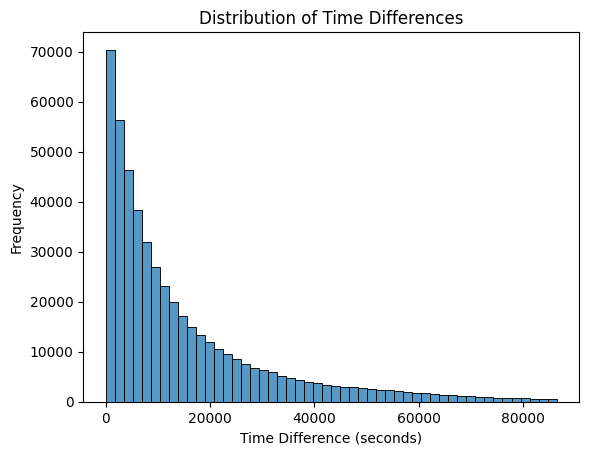

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['time_diff'], bins=50, kde=False)
plt.title('Distribution of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()

In [74]:
# 1분 간격 거래 필터링
short_time_transactions = data[data['time_diff'] <= 60]  # 1분 이내 거래
print(f"Number of transactions within 1 minutes: {len(short_time_transactions)}")

Number of transactions within 1 minutes: 2818


In [75]:
# 1분 거래의 카드별 빈도 분석
short_time_by_card = short_time_transactions['cc_num'].value_counts()
print(short_time_by_card.head(10))  # 1분 간격 거래가 많은 상위 10개 카드

cc_num
4586810168620942       49
4364010865167176       44
6538441737335434       42
4587657402165341815    41
372520049757633        39
3545109339866548       37
4716561796955522       35
372509258176510        34
4745996322265          34
6011438889172900       33
Name: count, dtype: int64


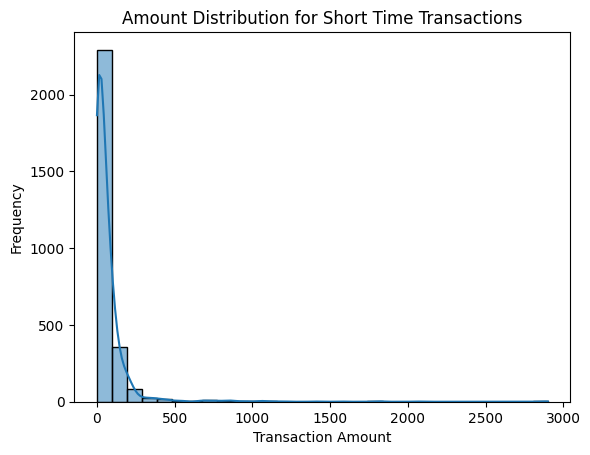

In [76]:
# 1분 간격 거래 금액 분포 분석
sns.histplot(short_time_transactions['amt'], bins=30, kde=True)
plt.title('Amount Distribution for Short Time Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [77]:
# 1분 거래 간격과 사기 여부의 상관성 분석
fraud_short_time = short_time_transactions[short_time_transactions['is_fraud'] == 1]
print(f"Number of fraudulent transactions within 1 minutes: {len(fraud_short_time)}")

Number of fraudulent transactions within 1 minutes: 19


In [30]:
# 전체 대비 사기 거래 비율과 1분 거래 건의 사기 거래 비중
short_time_fraud_rate = len(fraud_short_time) / len(short_time_transactions) * 100
overall_fraud_rate = len(data[data['is_fraud'] == 1]) / len(data) * 100

print(f"Fraud Rate in Short Time Gaps (<= 1 min): {short_time_fraud_rate:.2f}%")
print(f"Overall Fraud Rate: {overall_fraud_rate:.2f}%")


Fraud Rate in Short Time Gaps (<= 1 min): 1.52%
Overall Fraud Rate: 0.35%


### 모델링

In [78]:
# 시간 간격 변수 추가
data['short_time_flag'] = data['time_diff'] <= 60  # 1분 이내 거래 여부

In [79]:
# 특정 카드에서 1분 내 거래 횟수 누적
data['short_time_count'] = data.groupby('cc_num')['short_time_flag'].cumsum()

In [80]:
# 시간대(time_of_day) 변수와 결합, 특정 시간대 짧은 간격 거래 탐지
data['short_time_by_time_of_day'] = data['short_time_flag'] & (data['time_of_day'] == 'Night')


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# 주요 변수와 목표 변수 설정
features = ['amt', 'city_pop', 'time_diff', 'short_time_flag']
X = data[features]
y = data['is_fraud']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# 의사결정나무 모델 초기화 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 모델 초기화 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
# 예측
dt_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
y_pred = dt_model.predict(X_test)

In [94]:
# 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9954049981674291

----- End of the Project -----